In [2]:
#%run -i '../../scripts/utility_readblt.py' 'mu4j'

In [2]:
from utility_common import *
from utility_plotter import *
import ROOT
from IPython.display import clear_output
## add plotting option and load plotting parameter table
%matplotlib inline
#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

# 1. Read data and MC as dataframe

In [3]:
selection  = "mu4j"
pickledir  =  "/home/zchen/Documents/Analysis/workplace/data/pickle/{}/".format(selection)

In [4]:
def prepare_df_list(nbjetcut):
    # read cuts
    cuts = GetSelectionCut(selection) + "& (nBJets{})".format(nbjetcut)
    # load data
    Data = LoadDataframe(pickledir + "data2016").query(cuts)
    Fake = LoadDataframe(pickledir + "data2016_inverseISO").query("nBJets{}&(lepton1_pt > 30)".format(nbjetcut))
    MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)
    MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
    MCt  = LoadDataframe(pickledir + "mct").query(cuts)
    MCtt = LoadDataframe(pickledir + "mctt").query(cuts)
    # signal mc is tt+tW
    MCsg  = pd.concat([MCt,MCtt],ignore_index=True)
    MCsgf = MCsg.query('genCategory in [16,18,19,20,21] ') # semilep and had
    MCsg0 = MCsg.query('genCategory in [1,2,3,4,5,6,7,8,9,10,11,12]') #other lep
    MCsg1 = MCsg.query('genCategory in [17]') #mu+j
    MCsg2 = MCsg.query('genCategory in [13,14,15]') #mutau
    
    return [Fake,MCzz,MCdy,MCsgf,MCsg0,MCsg1,MCsg2,Data],MCt,MCtt

# 2. Plot kinematics

In [5]:
pp         = pd.read_csv("plotparameters4j.csv")
label_list = ['Fakes','Diboson','V+Jets',
              r'$tt/tW \rightarrow lh$ other',
              r'$tt/tW \rightarrow ll$ other',
              r'$tt/tW \rightarrow \mu + h$',
              r'$tt/tW \rightarrow \mu+ \tau$',
              'data']

color_list = ["gray","#a32020", "#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple", "k"]

In [6]:
for nbjetcut in ["==1",">1",">=1"]:
    ## 1. prepare df_list
    df_list,_,__ = prepare_df_list(nbjetcut)
    
    ## 2. make plots
    plotoutdir = GetPlotDir(selection, nbjetcut)
    print(plotoutdir)
    for index, row in pp.iterrows():
        v,a,b,step,xl = row["var"],row["lower"],row["upper"],row["step"],row["xlabel"]
        
        plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[0.07/(1-0.07),1,1,1,1,1,1],hasFake=True)
        plotter.settingPlot(xl,label_list,color_list)
        plotter.makePlot(plotoutdir)

        # print out process
        print("making plots nbjet{0}: {1}/{2}".format(nbjetcut,index,len(pp)))
        clear_output(wait=True)
        plt.close()
        
print('finish all making plots')

ValueError: No objects to concatenate

# 3. Counting

In [16]:
nbjetcut = "==1"
df_list,MCt,MCtt = prepare_df_list(nbjetcut)
ctr = SelectionCounter()

In [ ]:
plt.rc("figure",facecolor="w",figsize=(6,4))

v,a,b,step,xl = "lepton1_pt",0,200,5,"lepton1_pt [GeV]"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[0.0616,1,1,1,1,1,1],hasFake=True)
plotter.settingPlot(xl,label_list,color_list)
plotter.makePlot()

In [10]:
print("(nBJets{})".format(nbjetcut))

print("MCtt: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=False)) )
print("MCtt width: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=True)) )

print("MCt : {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=False)) )
print("MCt width: {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=True)) )

(nBJets==1)
MCtt: [16, 50599, 106036, 0, 950, 1315, 5, 6666, 11, 10, 6990, 26, 19571, 16782, 101285, 741, 2564916, 134, 169441, 558, 5020]
MCtt width: [14.151006391271949, 47901.27170823974, 99692.25454671081, 0.0, 892.6349425225053, 1225.5950669978047, 5.248558163642883, 6256.172355218208, 10.767688274383545, 8.283100419328548, 6490.447014340505, 24.579904729500413, 18424.674546646245, 15832.37124873323, 95678.20237879803, 650.7937642890902, 2447334.5796672483, 122.82969037909061, 159544.820983895, 516.1221773929428, 4708.173939784325]
MCt : [0, 213, 486, 0, 3, 7, 0, 35, 0, 0, 43, 0, 83, 79, 454, 0, 15638, 0, 1181, 3, 24]
MCt width: [0.0, 205.31713679619133, 463.56581679027295, 0.0, 2.9710735082626343, 7.464638710021973, 0.0, 33.89142569899559, 0.0, 0.0, 39.203631756827235, 0.0, 84.46583732962608, 74.6269469121471, 437.56818969687447, 0.0, 15130.52579425259, 0.0, 1149.1818336599972, 3.182469367980957, 21.87964087445289]


In [11]:
ctr.countSlt_Scaled(df_list)

data:639152.0
TotalMC:1001279.956366413
------ MC break down ------
[3.89704000e+05 3.75470398e+02 2.97312406e+04 3.33502285e+04
 3.22213646e+04 4.90142991e+05 2.57546612e+04]


In [13]:
for thisdf in [df_list[1],df_list[2], MCt, MCtt, df_list[-1]]:
    n = np.sum(thisdf.eventWeight)
    nerr = np.sum(thisdf.eventWeight**2)**0.5
    print('{:.2f},{:.2f}'.format(n,nerr))

375.47,12.88
29731.24,251.12
22927.44,175.73
558541.81,331.17
639152.00,799.47


In [14]:
# print Generator information
f = ROOT.TFile("../../data/root/2016MC.root")
print("MCtt : {}".format(ctr.countGen_ByTauDecay(f,'ttbar_inclusive')) )
temp = np.array(ctr.countGen_ByTauDecay(f,'t_tw'))
temp+= np.array(ctr.countGen_ByTauDecay(f,'tbar_tw'))
print("MCt  : {}".format(list(temp)) )

MCtt : [1811409.0, 1811532.0, 3620281.0, 57057.0, 54227.0, 111125.0, 418126.0, 407605.0, 763147.0, 642646.0, 626108.0, 2350887.0, 643368.0, 627277.0, 2353727.0, 22670017.0, 22653517.0, 4016590.0, 3923504.0, 14718933.0, 70930278.0]
MCt  : [23105.0, 23040.0, 46342.0, 694.0, 717.0, 1420.0, 5260.0, 5158.0, 9727.0, 8199.0, 8029.0, 30054.0, 8163.0, 8006.0, 29970.0, 290101.0, 289467.0, 50864.0, 50050.0, 187515.0, 904067.0]


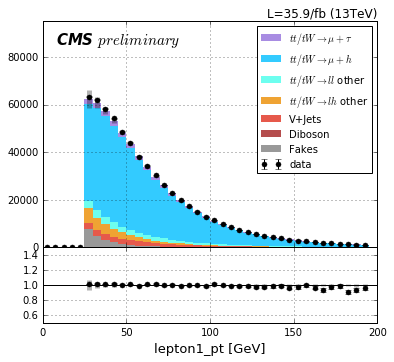